In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def cv2mpl(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [208]:
img = cv2.imread("TrainingData1/image120.png")
h = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:,:,0]
s = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:,:,1]
v = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:,:,2]

l = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)[:,:,0]
a = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)[:,:,1]
b = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)[:,:,2]

def solidity(cnt):
    area = cv2.contourArea(cnt)
    hull = np.int0(cv2.boxPoints(cv2.minAreaRect(cnt)))
    hull_area = cv2.contourArea(hull)
    if hull_area > 0.03:
        solidity = float(area) / hull_area
        return solidity
    else:
        return 0.0

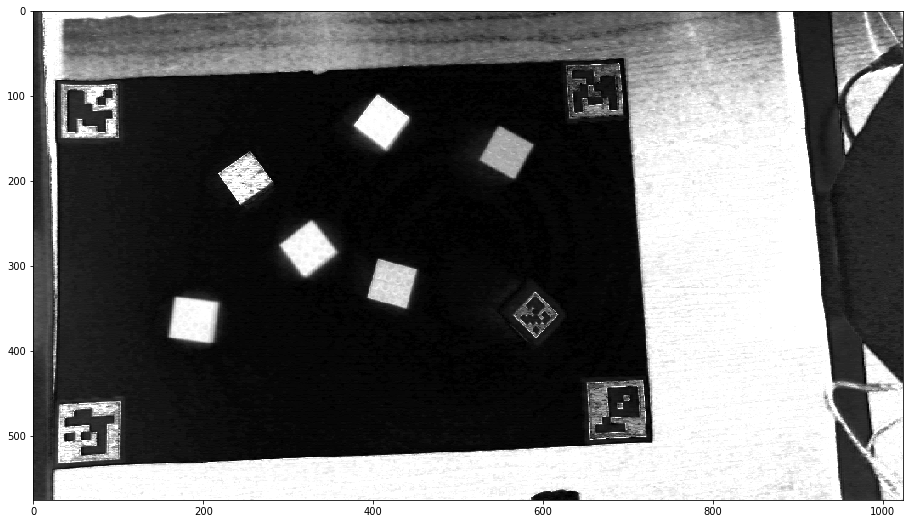

In [166]:
plt.figure(figsize=(16,9))
plt.imshow(s, cmap="gray")

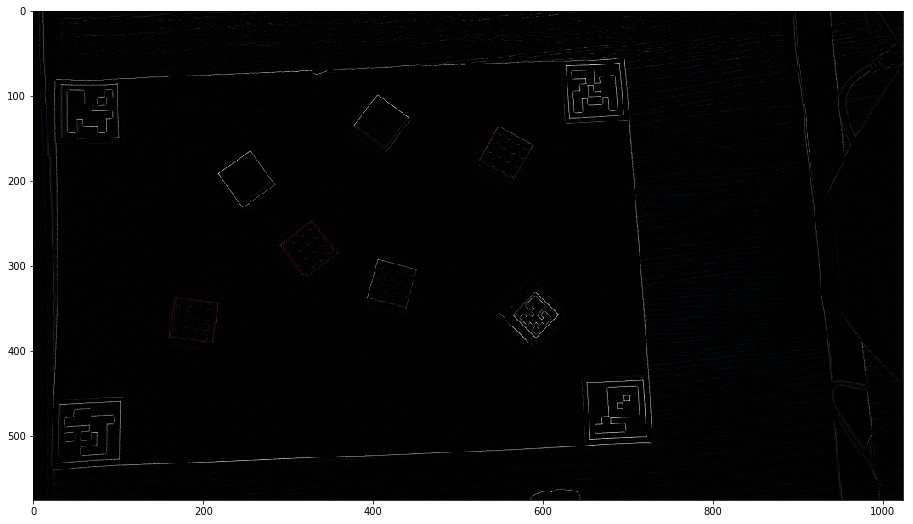

In [167]:
plt.figure(figsize=(16,9))
plt.imshow(cv2.Laplacian(img, cv2.CV_8U), cmap="gray")

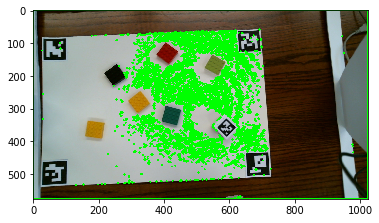

In [168]:
im2, contours, hierarchy = cv2.findContours(s.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
c = cv2.drawContours(img, contours, -1, (0,255,0), 3)
plt.imshow(cv2mpl(c))

In [169]:
_, thresh = cv2.threshold(s.copy(), 100, 255, cv2.THRESH_BINARY)
thresh.shape

(576, 1024)

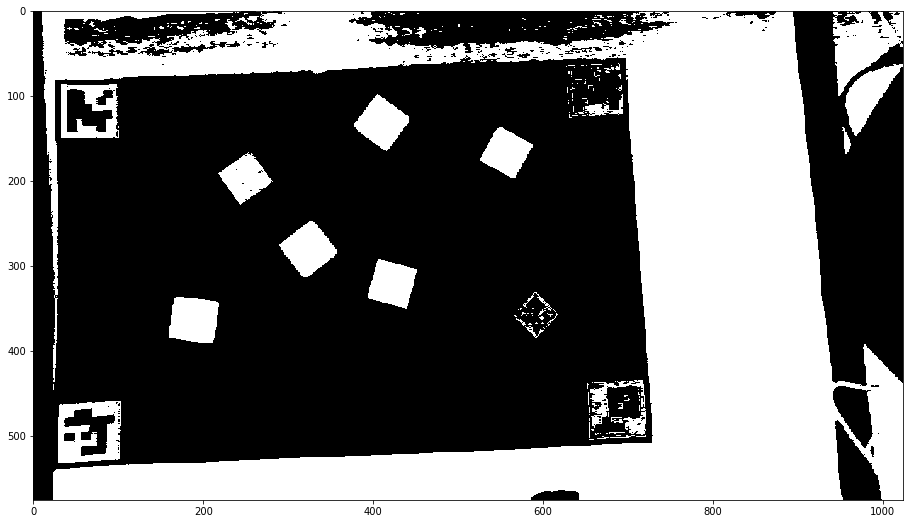

In [186]:
plt.figure(figsize=(16,9))
plt.imshow(thresh, cmap="binary_r")

638

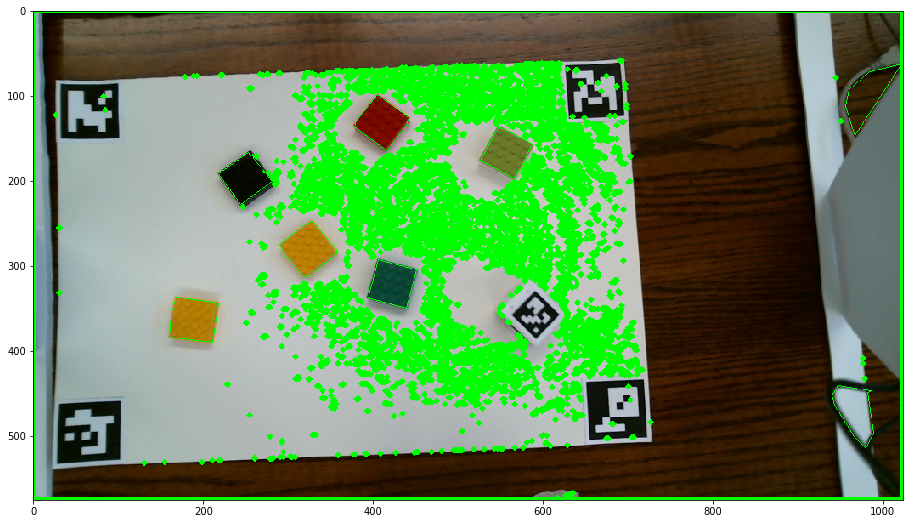

In [198]:
plt.figure(figsize=(16,9))
im2, contours2, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
c2 = cv2.drawContours(img.copy(), [cv2.approxPolyDP(c,0.01*cv2.arcLength(c,True),True) for c in contours2 if cv2.contourArea(c) > 1750 and cv2.contourArea(c) < 2750], -1, (0,255,0), 1)
plt.imshow(cv2mpl(c2))
contours2.__len__()

In [172]:
# for c in contours2:
    if 
    print(cv2.contourArea(c))

IndentationError: unexpected indent (<ipython-input-172-30f138ba602c>, line 2)

In [199]:
cg = [c for c in contours2 if cv2.contourArea(c) > 1700 and cv2.contourArea(c) < 2750]

In [193]:
len(cg)


10

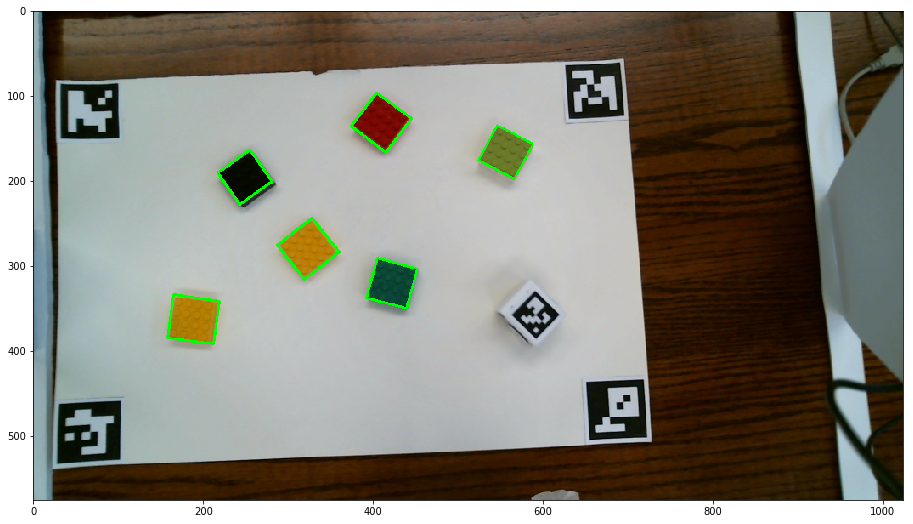

In [211]:
c2 = cv2.drawContours(img.copy(), [np.int0(cv2.boxPoints(cv2.minAreaRect(c))) for c in cg if solidity(c) > 0.8], -1, (0,255,0), 2)
plt.figure(figsize=(16,9))
plt.imshow(cv2mpl(c2))

In [174]:

#c2 = cv2.drawContours(img.copy(), [np.int0(cv2.boxPoints(cv2.minAreaRect(c))) for c in cg if ], -1, (0,255,0), 2)
#plt.figure(figsize=(16,9))
#plt.imshow(cv2mpl(c2))

SyntaxError: invalid syntax (<ipython-input-174-d28bcfd52ad5>, line 2)

In [203]:


for cnt in cg:
    area = cv2.contourArea(cnt)
    hull = np.int0(cv2.boxPoints(cv2.minAreaRect(cnt)))
    hull_area = cv2.contourArea(hull)
    solidity = float(area) / hull_area
    print(solidity)

0.5023310023310024
0.9276848354020507
0.9510221465076661
0.9275525525525525
0.9433111954459203
0.9458295557570263
0.9248372460051292
0.5982517482517482
0.6332292479833463
0.6171952078928823


In [231]:
from skimage import exposure

def solidity(cnt):
    area = cv2.contourArea(cnt)
    hull = np.int0(cv2.boxPoints(cv2.minAreaRect(cnt)))
    hull_area = cv2.contourArea(hull)
    if hull_area > 0.03:
        solidity = float(area) / hull_area
        return solidity
    else:
        return 0.0
    
def pipeline(img):
    s = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:,:,1]
    _, thresh = cv2.threshold(s.copy(), 100, 255, cv2.THRESH_BINARY)
    im2, contours2, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    cg = [c for c in contours2 if cv2.contourArea(c) > 1700 and cv2.contourArea(c) < 2750]
    cg = [c for c in cg if solidity(c) > 0.8]
    boundingRects = [np.int0(cv2.boxPoints(cv2.minAreaRect(c))) for c in cg]
    boundingBoxes = [cv2.boundingRect(c) for c in cg]
    boundingBoxes = [((x - 10, y - 10), (x+w + 10, y+h + 10)) for x, y, w, h in boundingBoxes]
    return boundingBoxes

for index in range(1, 20):
    image = cv2.imread("TrainingData1/image{}.png".format(index))
    i = image.copy()
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    print(i.shape)
    i = exposure.equalize_adapthist(i).astype(np.float32) * 255.0
    print(i[10,:])
    print(i.shape)
    i = cv2.cvtColor(i, cv2.COLOR_RGB2BGR)
    #for box in pipeline(image):
    #    cv2.rectangle(i, box[0], box[1], (0, 255, 0), 2)
    #plt.imshow(cv2mpl(i))
    cv2.imwrite("TrainingDataOut/image{}.png".format(index), i)
    

(576, 1024, 3)


/usr/local/miniconda3/miniconda3/envs/mlenv/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


[[196.56807   233.42459   236.1547   ]
 [196.56807   233.42459   236.1547   ]
 [196.56807   233.42459   236.1547   ]
 ...
 [ 73.388405   56.772163   24.924366 ]
 [ 58.387486   43.48004    14.907443 ]
 [ 48.517628   33.84951     7.8982186]]
(576, 1024, 3)
(576, 1024, 3)
[[201.15529   235.83725   239.99908  ]
 [201.15529   235.83725   239.99908  ]
 [201.15529   235.83725   239.99908  ]
 ...
 [ 76.36122    70.59811    40.341774 ]
 [ 60.81453    49.169193   11.645336 ]
 [ 49.119427   38.593838    4.6780405]]
(576, 1024, 3)
(576, 1024, 3)
[[198.96478   233.74884   237.92293  ]
 [201.11414   236.02977   240.21967  ]
 [203.90738   234.63315   240.21967  ]
 ...
 [ 78.354576   60.942444   27.569202 ]
 [ 57.99645    42.86694    11.347131 ]
 [ 46.49715    34.02231     4.5363073]]
(576, 1024, 3)
(576, 1024, 3)
[[190.37407   224.74718   234.00148  ]
 [190.37407   224.74718   234.00148  ]
 [189.07602   223.21474   229.77988  ]
 ...
 [ 74.83169    60.7125     26.826454 ]
 [ 57.116623   42.216637   11